# Machine Learning Project: Presentation I
Group Members: Sanjay Krishna Moorthy , Viswashanthi Bonala , Mitchell Moreno , Sneha Dudyala , Susmitha Haripriya Varanasi

In [1]:
!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
!pip install -q findspark
import findspark
findspark.init()

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import Packages
from pyspark.sql.types import *
from pyspark.sql.functions import split, col
import pyspark.sql.functions as func
from pyspark.sql.functions import length
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
rcParams.update({'font.size': 18})


In [4]:
from pyspark.sql.types import *
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# Setting up Reviews Dataframe

In [5]:
custom_schema = StructType([
        StructField("ReviewId", IntegerType()),
        StructField("RecipeId", IntegerType()),
        StructField("AuthorId", IntegerType()),
        StructField("AuthorName", StringType()),
        StructField("Rating", IntegerType()),
        StructField("Review", StringType())
    ])

df_reviews = spark.read.csv('/content/drive/MyDrive/data/reviews.csv',schema = custom_schema, header=True)
df_reviews = df_reviews.drop("DateSubmitted")
df_reviews = df_reviews.drop("DateModified")

In [6]:
df_reviews=df_reviews.na.drop()
df_reviews.show(5)

+--------+--------+--------+----------------+------+--------------------+
|ReviewId|RecipeId|AuthorId|      AuthorName|Rating|              Review|
+--------+--------+--------+----------------+------+--------------------+
|       2|     992|    2008|       gayg msft|     5|better than any y...|
|       7|    4384|    1634|   Bill Hilbrich|     4|I cut back on the...|
|       9|    4523|    2046|Gay Gilmore ckpt|     2|i think i did som...|
|      13|    7435|    1773|   Malarkey Test|     5|easily the best i...|
|      14|      44|    2085|      Tony Small|     5|  An excellent dish.|
+--------+--------+--------+----------------+------+--------------------+
only showing top 5 rows



# Setting up Recipes Dataframe

In [7]:
custom_schema2 = StructType([
        StructField("RecipeId", IntegerType()),
        StructField("Name", StringType()),
        StructField("AuthorId", StringType()),
        StructField("AuthorName", StringType()),
        StructField("CookTime", StringType()),
        StructField("PrepTime", StringType()),
        StructField("TotalTime", StringType()),
        StructField("DatePublished", StringType()),
        StructField("Description", StringType()),
        StructField("Images", StringType()),
        StructField("RecipeCategory", StringType()),
        StructField("Keywords", StringType()),
        StructField("RecipeIngredientQuantities", StringType()),
        StructField("RecipeIngredientParts", StringType()),
        StructField("AggregatedRating", FloatType()),
        StructField("ReviewCount", StringType()),
        StructField("Calories", StringType()),
        StructField("FatContent", FloatType()),
        StructField("SaturatedFatContent", FloatType()),
        StructField("CholesterolContent", FloatType()),
        StructField("SodiumContent", FloatType()),
        StructField("CarbohydrateContent", FloatType()),
        StructField("FiberContent", FloatType()),
        StructField("SugarContent", FloatType()),
        StructField("ProteinContent", FloatType()),
        StructField("RecipeServings", StringType()),
        StructField("RecipeYield", StringType()),
        StructField("RecipeInstructions", StringType())
    ])
df_recipes = spark.read.csv('/content/drive/MyDrive/data/recipes.csv',schema = custom_schema2, header=True,escape='"')
df_recipes = df_recipes.drop("Images")
df_recipes = df_recipes.na.drop()

df_recipes.show(5)

+--------+--------------------+--------+--------------------+--------+--------+---------+--------------------+--------------------+--------------+--------------------+--------------------------+---------------------+----------------+-----------+--------+----------+-------------------+------------------+-------------+-------------------+------------+------------+--------------+--------------+------------+--------------------+
|RecipeId|                Name|AuthorId|          AuthorName|CookTime|PrepTime|TotalTime|       DatePublished|         Description|RecipeCategory|            Keywords|RecipeIngredientQuantities|RecipeIngredientParts|AggregatedRating|ReviewCount|Calories|FatContent|SaturatedFatContent|CholesterolContent|SodiumContent|CarbohydrateContent|FiberContent|SugarContent|ProteinContent|RecipeServings| RecipeYield|  RecipeInstructions|
+--------+--------------------+--------+--------------------+--------+--------+---------+--------------------+--------------------+-----------

# Setting up Recipes Dataframe joined with Reviews Dataframe

In [8]:
df_RecipeReviews = df_reviews.join(df_recipes, 'RecipeId') \
                             .select(df_reviews['ReviewId'],
                                     df_reviews['AuthorId'].alias('ReviewerId'),
                                     df_reviews['RecipeId'],
                                     df_recipes['Name'].alias('RecipeName'),
                                     df_reviews['Rating'],
                                     df_reviews['Review'],
                                     df_recipes['CookTime'],
                                     df_recipes['PrepTime'],
                                     df_recipes['TotalTime'],
                                     df_recipes['RecipeCategory'],
                                     df_recipes['AggregatedRating'],
                                     df_recipes['ReviewCount'].alias('RecipeReviewCount'),
                                     df_recipes['RecipeIngredientParts'],
                                     df_recipes['Calories'],
                                     df_recipes['FatContent'],
                                     df_recipes['SaturatedFatContent'],
                                     df_recipes['CholesterolContent'],
                                     df_recipes['SodiumContent'],
                                     df_recipes['CarbohydrateContent'],
                                     df_recipes['FiberContent'],
                                     df_recipes['SugarContent'],
                                     df_recipes['ProteinContent'],
                                     df_recipes['RecipeServings'],
                                    )

df_RecipeReviews.show(10)

+--------+----------+--------+--------------------+------+--------------------+--------+--------+---------+--------------+----------------+-----------------+---------------------+--------+----------+-------------------+------------------+-------------+-------------------+------------+------------+--------------+--------------+
|ReviewId|ReviewerId|RecipeId|          RecipeName|Rating|              Review|CookTime|PrepTime|TotalTime|RecipeCategory|AggregatedRating|RecipeReviewCount|RecipeIngredientParts|Calories|FatContent|SaturatedFatContent|CholesterolContent|SodiumContent|CarbohydrateContent|FiberContent|SugarContent|ProteinContent|RecipeServings|
+--------+----------+--------+--------------------+------+--------------------+--------+--------+---------+--------------+----------------+-----------------+---------------------+--------+----------+-------------------+------------------+-------------+-------------------+------------+------------+--------------+--------------+
|  137709|   

In [9]:
# Changes the ingredients to an array and shows the schema and the dataframe
df_RecipeReviews = df_RecipeReviews.withColumn("RecipeIngredientParts", func.expr("substring(RecipeIngredientParts, 2)"))
df_RecipeReviews = df_RecipeReviews.withColumn("RecipeIngredientParts", func.translate(func.col("RecipeIngredientParts"), '()"', ''))
df_RecipeReviews = df_RecipeReviews.withColumn("RecipeIngredientParts", split(col('RecipeIngredientParts'), ','))
df_RecipeReviews.printSchema()
df_RecipeReviews.show(5, truncate = False)

root
 |-- ReviewId: integer (nullable = true)
 |-- ReviewerId: integer (nullable = true)
 |-- RecipeId: integer (nullable = true)
 |-- RecipeName: string (nullable = true)
 |-- Rating: integer (nullable = true)
 |-- Review: string (nullable = true)
 |-- CookTime: string (nullable = true)
 |-- PrepTime: string (nullable = true)
 |-- TotalTime: string (nullable = true)
 |-- RecipeCategory: string (nullable = true)
 |-- AggregatedRating: float (nullable = true)
 |-- RecipeReviewCount: string (nullable = true)
 |-- RecipeIngredientParts: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Calories: string (nullable = true)
 |-- FatContent: float (nullable = true)
 |-- SaturatedFatContent: float (nullable = true)
 |-- CholesterolContent: float (nullable = true)
 |-- SodiumContent: float (nullable = true)
 |-- CarbohydrateContent: float (nullable = true)
 |-- FiberContent: float (nullable = true)
 |-- SugarContent: float (nullable = true)
 |-- ProteinContent: float (

## Totals

In [10]:
numOfReviews = df_RecipeReviews.select('ReviewID').distinct().count()
numOfReviewers = df_RecipeReviews.select('ReviewerID').distinct().count()
print(f'In our combined dataframe, there are {numOfReviews:,} total reviews, from {numOfReviewers:,} different reviewers.')

In our combined dataframe, there are 798,270 total reviews, from 157,500 different reviewers.


In [11]:
numOfRecipes = df_RecipeReviews.select('RecipeID').distinct().count()
numOfRecipeCategories = df_RecipeReviews.select('RecipeCategory').distinct().count()
print(f'In our combined dataframe, there are {numOfRecipes:,} different recipes from {numOfRecipeCategories:,} different recipe categories.')

In our combined dataframe, there are 229,665 different recipes from 285 different recipe categories.


# Top Rated Categories on Average

In [12]:
df_RatingsByCategory = df_RecipeReviews.where(df_RecipeReviews["Rating"]>0).filter("RecipeReviewCount > 5") \
                                        .groupBy('RecipeCategory').agg({'Rating': 'mean'}) \
                                        .orderBy('avg(Rating)', ascending=False) \
                                        .limit(25)

df_RatingsByCategory.show(25)

+--------------------+------------------+
|      RecipeCategory|       avg(Rating)|
+--------------------+------------------+
|     Mashed Potatoes|               5.0|
|            Scottish|               5.0|
|             Pot Pie|               5.0|
|           Pakistani|               5.0|
|            Georgian|               5.0|
|           Ice Cream|               5.0|
|               Roast|               5.0|
|               Sweet|               5.0|
|            Nepalese|               5.0|
|          High Fiber|4.9523809523809526|
|                Nuts|             4.925|
|        Puerto Rican| 4.916666666666667|
|              Indian| 4.909090909090909|
|          Summer Dip| 4.909090909090909|
|        Whole Turkey| 4.892601431980907|
|               Mango| 4.883333333333334|
|           Stove Top| 4.878048780487805|
|              Creole| 4.877777777777778|
|           Cantonese|             4.875|
|           Norwegian|             4.875|
|    Beef Organ Meats| 4.870967741

# Top 25 Recipes with Five Star Reviews

In [13]:
df_FiveStarReviews = df_RecipeReviews.filter("Rating = 5") \
                                     .select(df_RecipeReviews['RecipeId'],
                                             df_RecipeReviews['RecipeName'],
                                             df_RecipeReviews['Rating'])

In [14]:
# Dataframe of top 25 recipes based on number of times they are reviewed
df_FiveStarReviews = df_FiveStarReviews.groupBy('RecipeName').count().sort(func.col('count').desc()).limit(25)
df_FiveStarReviews.show(10,truncate=False)

+---------------------------------+-----+
|RecipeName                       |count|
+---------------------------------+-----+
|Banana Bread                     |304  |
|Baked Potato Soup                |242  |
|Mexican Stack-Up #RSC            |215  |
|Bacon Lattice Tomato Muffins #RSC|192  |
|Chocolate Chip Cookies           |167  |
|Broccoli Salad                   |162  |
|Faux Febreeze                    |162  |
|Peanut Butter Cookies            |159  |
|Apple Crisp                      |157  |
|Chicken Enchiladas               |147  |
+---------------------------------+-----+
only showing top 10 rows



# Creating a Bar Chart for Count of Top 25 Recipes with 5 Star Reviews

In [15]:
fivestar_reviews = df_FiveStarReviews.select('count').collect()
fivestar_recipes = df_FiveStarReviews.select('RecipeName').collect()



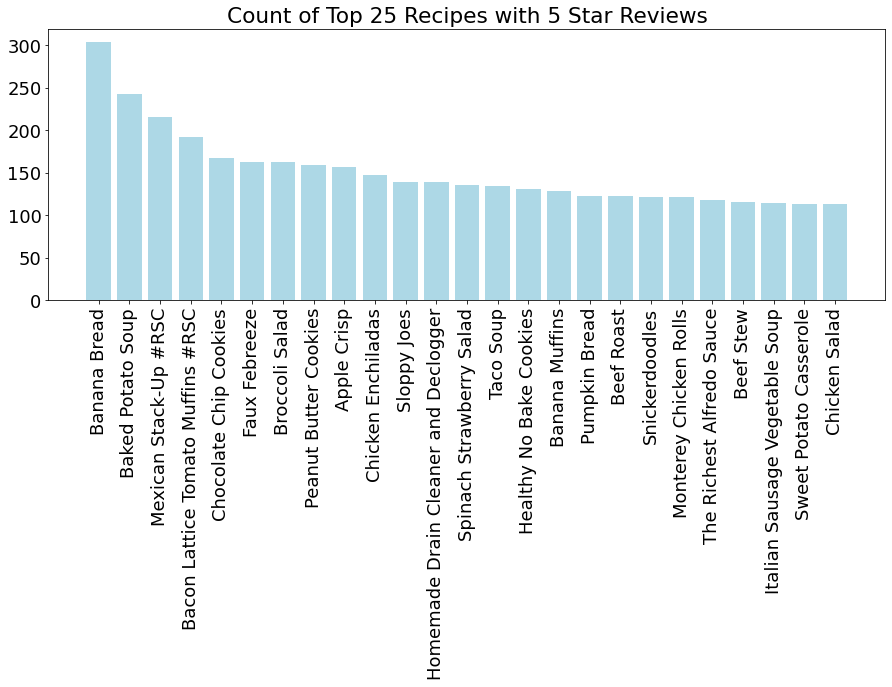

In [16]:
fivestar_reviews_list = []
fivestar_recipe_list = []

fivestar_len = len(fivestar_reviews)
for i in range(0, fivestar_len ): 
    fivestar_reviews_list.append(fivestar_reviews[i][0])

fivestar_len = len(fivestar_recipes)
for i in range(0, fivestar_len ): 
    fivestar_recipe_list.append(fivestar_recipes[i][0])

plt.bar(fivestar_recipe_list,fivestar_reviews_list,  color='lightblue') 
plt.xticks(rotation=90)
plt.title('Count of Top 25 Recipes with 5 Star Reviews')
plt.show()

# How many of each type of Reviews are there? (ie. # of 1 star, # of 2 star, etc.)

In [17]:
num_of_one_star = df_RecipeReviews.where(df_RecipeReviews['Rating']==1).count()
num_of_two_star = df_RecipeReviews.where(df_RecipeReviews['Rating']==2).count()
num_of_three_star = df_RecipeReviews.where(df_RecipeReviews['Rating']==3).count()
num_of_four_star = df_RecipeReviews.where(df_RecipeReviews['Rating']==4).count()
num_of_five_star = df_RecipeReviews.where(df_RecipeReviews['Rating']==5).count()
total_num_reviews = df_RecipeReviews.where(df_RecipeReviews["Rating"]>0).count()

print("The number of 1 star reviews: ", num_of_one_star )
print("The number of 2 star reviews: ", num_of_two_star)
print("The number of 3 star reviews: ", num_of_three_star )
print("The number of 4 star reviews: ", num_of_four_star )
print("The number of 5 star reviews: ", num_of_five_star)




The number of 1 star reviews:  9701
The number of 2 star reviews:  10471
The number of 3 star reviews:  32210
The number of 4 star reviews:  148643
The number of 5 star reviews:  562030


# Pie Chart of Ratings Distribution

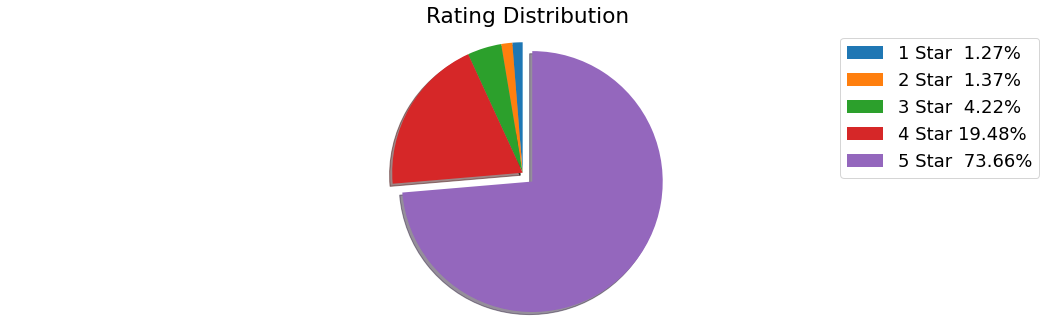

In [18]:
# Rating distribution looking at the total number of ratings in df_RecipeReviews dataframe
sizes = [num_of_one_star/total_num_reviews, num_of_two_star/total_num_reviews, num_of_three_star/total_num_reviews, num_of_four_star/total_num_reviews, num_of_five_star/total_num_reviews]

labels = '1 Star  ' +str(round(sizes[0]*100,2))+'%', '2 Star  '+str(round(sizes[1]*100,2))+'%', '3 Star  '\
+str(round(sizes[2]*100,2))+'%', '4 Star '+str(round(sizes[3]*100,2))+'%', '5 Star  '+str(round(sizes[4]*100,2))+'%'

explode = (0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,
        shadow=True, startangle=90)
plt.legend( labels, loc="best")
ax1.axis('equal')
plt.title('Rating Distribution')
plt.tight_layout()
plt.show()

# How Many Reviews has each Customer left?

In [19]:
count_reviews = df_RecipeReviews.groupBy('ReviewerId').count().sort(func.col('count').desc())
count_reviews 


DataFrame[ReviewerId: int, count: bigint]

In [20]:
# Showing dataframe of ReviewerId along with number of reviews they left
count_reviews.show()
count_reviews.dtypes

+----------+-----+
|ReviewerId|count|
+----------+-----+
|    424680| 6998|
|     37449| 4773|
|    383346| 3510|
|    169430| 3178|
|     89831| 2943|
|    199848| 2799|
|    128473| 2610|
|     58104| 2588|
|    133174| 2353|
|      4470| 2316|
|    369715| 2255|
|    305531| 2157|
|     95743| 2139|
|    498271| 2048|
|     39835| 2022|
|    226863| 1853|
|    176615| 1850|
|    107583| 1810|
|     80353| 1775|
|      6357| 1745|
+----------+-----+
only showing top 20 rows



[('ReviewerId', 'int'), ('count', 'bigint')]

# How long is each users worded review?
Creating Scatter plot where each dot is the length of a specific review text

In [21]:
lengths=df_RecipeReviews.select(length('Review').alias('length')).collect()

In [22]:
rev_len=[]
l= len(lengths)
for i in range(0,l):
  rev_len.append(lengths[i][0])

x = range(0,l)

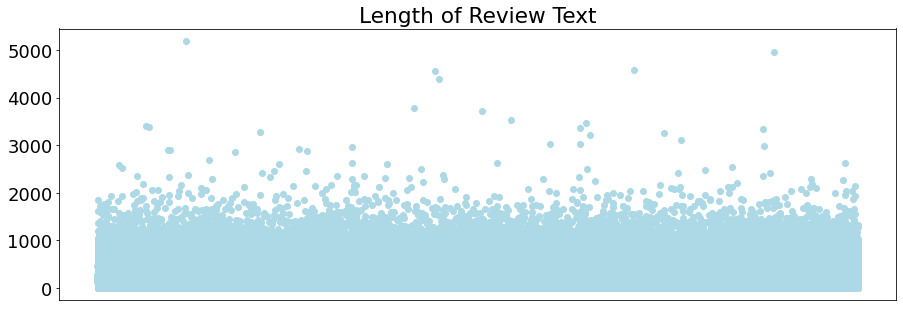

In [23]:
plt.xticks([])
plt.title('Length of Review Text')
plt.scatter(x, rev_len,  color='lightblue') 

## Most Common Ingredients
Creating a Bar chart of most common ingridients in df_RecipesReviews Dataframe

In [24]:
df_ingredients = df_RecipeReviews.select('RecipeIngredientParts').distinct()
df_ingredients.show()

+---------------------+
|RecipeIngredientParts|
+---------------------+
| [salt,  pepper,  ...|
| [water,  cottage ...|
| [sugar,  water,  ...|
| [fresh pineapple,...|
| [linguine,  fettu...|
| [onion,  monterey...|
| [onions,  garlic ...|
| [olive oil,  shal...|
| [yellow onion,  g...|
| [flour,  sugar,  ...|
| [large shrimp,  f...|
| [butter,  sugar, ...|
| [coconut,  pecans...|
| [boiling water,  ...|
| [water,  garlic, ...|
|     [barbecue sauce]|
| [graham cracker c...|
| [mayonnaise,  cre...|
| [pears,  sugar,  ...|
| [water,  sugar,  ...|
+---------------------+
only showing top 20 rows



In [25]:
from pyspark.sql.functions import explode
# Exploding ingridents from each recipe 
ingredients_list = df_ingredients.select(explode(df_ingredients['RecipeIngredientParts']))
ingredients_list.show()

+-----------------+
|              col|
+-----------------+
|             salt|
|           pepper|
| unbleached flour|
|           onions|
|       lager beer|
|              ale|
|       beef broth|
|       cornstarch|
|            water|
|   cottage cheese|
|        margarine|
|      bread flour|
|         dry milk|
|             salt|
|            sugar|
|            water|
|      apple cider|
|  fresh pineapple|
|            honey|
|           butter|
+-----------------+
only showing top 20 rows



In [26]:
unique_ingredients_df = ingredients_list.groupBy('col').count()
unique_ingredients_df = unique_ingredients_df.orderBy('count', ascending=False)
unique_ingredients_df.show(20)


+----------------+-----+
|             col|count|
+----------------+-----+
|            salt|85859|
|          butter|46153|
|           sugar|44020|
|           onion|35316|
|           water|31179|
|            eggs|28452|
|       olive oil|25199|
|            milk|24625|
|   garlic cloves|22845|
|          pepper|22844|
|           flour|22053|
|     brown sugar|17869|
|          garlic|17810|
|   baking powder|17235|
|             egg|15862|
| parmesan cheese|14939|
|         vanilla|14384|
|     baking soda|14284|
|          butter|14238|
|     lemon juice|13875|
+----------------+-----+
only showing top 20 rows



In [27]:
unique_ingredients_df.count()

9853

In [28]:
top_15_ingredients = unique_ingredients_df.take(15)
top_15_ingredients_df = spark.createDataFrame(top_15_ingredients)
top_15_ingredients_df.show()

+--------------+-----+
|           col|count|
+--------------+-----+
|          salt|85859|
|        butter|46153|
|         sugar|44020|
|         onion|35316|
|         water|31179|
|          eggs|28452|
|     olive oil|25199|
|          milk|24625|
| garlic cloves|22845|
|        pepper|22844|
|         flour|22053|
|   brown sugar|17869|
|        garlic|17810|
| baking powder|17235|
|           egg|15862|
+--------------+-----+



In [29]:
ingredients = top_15_ingredients_df.select('col').collect()
ingredients_count = top_15_ingredients_df.select('count').collect()

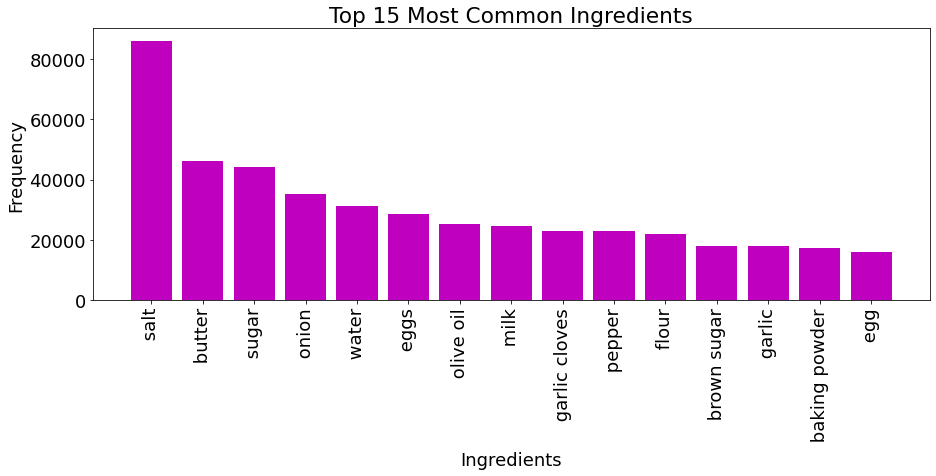

In [30]:
ingredients_list = []
ingredient_count_list = []


for i in range(15): 
    ingredients_list.append(ingredients[i][0])

for i in range(15): 
    ingredient_count_list.append(ingredients_count[i][0])

plt.bar(ingredients_list, ingredient_count_list, color='m') 
plt.xticks(rotation=90)
plt.title('Top 15 Most Common Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.show();

# Ratings for a Customer: alana1380
Rating given by user alana1380

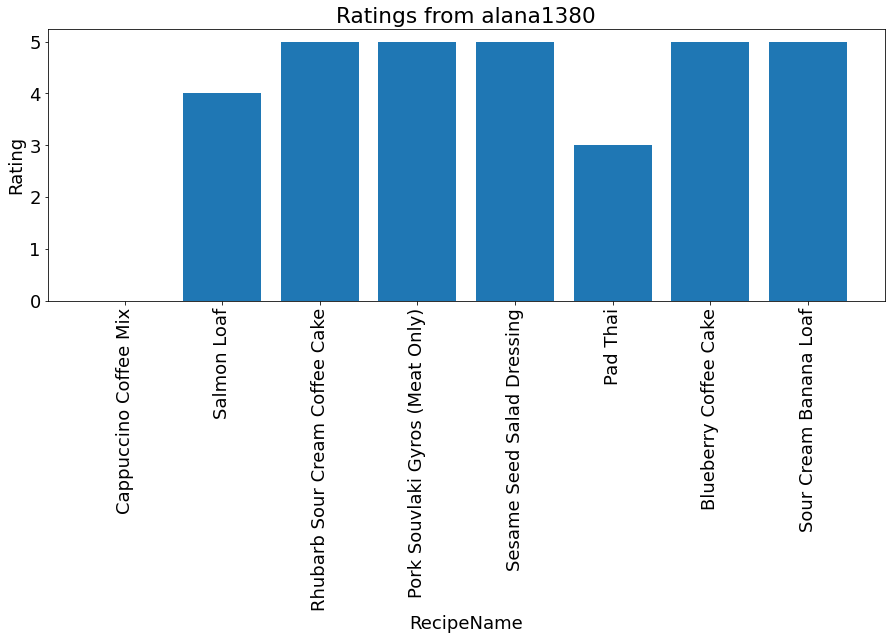

In [31]:
x=df_RecipeReviews.filter(df_RecipeReviews.ReviewerId==146824).select('RecipeName').rdd.flatMap(lambda x: x).collect()
y=df_RecipeReviews.filter(df_RecipeReviews.ReviewerId==146824).select('Rating').rdd.flatMap(lambda x: x).collect()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Ratings from alana1380')
plt.xlabel('RecipeName')
plt.ylabel('Rating')
plt.show()